In [3]:
# import dependencies
import pandas as pd
from matplotlib import pyplot

In [4]:
# read predict data
predict_data = pd.read_csv("resources/predict_data.csv", index_col=0)

# In our model, we are assumming that 'Blue' is our fighter, and 'Red' is the opponent's fighter.
# We will therefore convert the 'Winner' column to be 'Winner if Blue wins, or 'Loser' if Red wins.
predict_data["Winner"] = predict_data["Winner"].replace("Blue", "Winner")
predict_data["Winner"] = predict_data["Winner"].replace("Red", "Loser")

predict_data

,Winner,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_age,B_age
0,Loser,0,1,0,3.420000,0.5900,0.700000,0.240000,1.0000,4,...,2,11,0,0,13,Orthodox,187.96,193.04,37,29
1,Winner,2,0,0,5.160000,0.4200,0.800000,0.790000,0.2200,2,...,3,4,3,0,11,Orthodox,180.34,193.04,33,32
2,Winner,1,0,0,2.920000,0.4100,0.100000,1.150000,0.3400,5,...,0,1,5,0,6,Orthodox,190.50,195.58,34,32
3,Loser,1,0,0,4.040000,0.3400,0.000000,0.000000,0.0000,0,...,2,2,0,0,4,Orthodox,175.26,182.88,29,32
4,Winner,0,2,0,5.220000,0.5600,0.000000,2.540000,0.3900,2,...,2,0,2,0,4,Orthodox,175.26,177.80,28,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,Loser,1,0,0,5.250000,0.5550,0.125000,0.000000,0.0000,2,...,1,3,0,0,5,Orthodox,182.88,182.88,28,31
4889,Loser,1,0,0,10.750000,0.3325,1.250000,1.250000,0.6625,1,...,1,1,1,0,5,Orthodox,170.18,177.80,28,28
4890,Winner,0,1,0,22.166667,0.5100,0.166667,2.500000,0.4800,2,...,1,0,1,0,3,Orthodox,187.96,195.58,29,39
4893,Loser,1,0,0,8.000000,0.3400,1.000000,1.000000,1.0000,0,...,0,0,0,0,0,Orthodox,193.04,198.12,27,27


Preprocess data for machine learning models

In [5]:
# Assign X (data) and y (target)
X = predict_data.drop("Winner", axis=1)
y = predict_data["Winner"]

In [6]:
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(X)

X

,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,...,R_age,B_age,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,0,1,0,3.420000,0.5900,0.700000,0.240000,1.0000,4,2,...,37,29,0,1,0,0,0,1,0,0
1,2,0,0,5.160000,0.4200,0.800000,0.790000,0.2200,2,5,...,33,32,0,1,0,0,0,1,0,0
2,1,0,0,2.920000,0.4100,0.100000,1.150000,0.3400,5,5,...,34,32,0,0,1,0,0,1,0,0
3,1,0,0,4.040000,0.3400,0.000000,0.000000,0.0000,0,1,...,29,32,0,1,0,0,0,1,0,0
4,0,2,0,5.220000,0.5600,0.000000,2.540000,0.3900,2,3,...,28,33,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,1,0,0,5.250000,0.5550,0.125000,0.000000,0.0000,2,4,...,28,31,0,1,0,0,0,1,0,0
4889,1,0,0,10.750000,0.3325,1.250000,1.250000,0.6625,1,2,...,28,28,0,1,0,0,0,1,0,0
4890,0,1,0,22.166667,0.5100,0.166667,2.500000,0.4800,2,2,...,29,39,0,1,0,0,0,1,0,0
4893,1,0,0,8.000000,0.3400,1.000000,1.000000,1.0000,0,1,...,27,27,0,1,0,0,0,1,0,0


In [7]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Try logistic regression model

In [10]:
# create logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [11]:
# Fit model using training data
classifier.fit(X_train_scaled, encoded_y_train)

LogisticRegression()

In [37]:
# Calculate the accuracy score and predict target values
score = classifier.score(X_test_scaled, encoded_y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_predict = classifier.predict(X_test_scaled)

Test score: 63.38 %


B_current_lose_streak: 0.06455732770317135
B_current_win_streak: 0.12223014782283431
B_draw: 0.05203833590635422
B_avg_SIG_STR_landed: 0.08149117558306944
B_avg_SIG_STR_pct: -0.00867531615383128
B_avg_SUB_ATT: -0.010118470142201368
B_avg_TD_landed: 0.07501109339133483
B_avg_TD_pct: -0.05558222014266207
B_longest_win_streak: 0.02976915953477471
B_losses: -0.07408548016814046
B_total_rounds_fought: -0.05365837548804193
B_total_title_bouts: -0.09570092915077318
B_win_by_Decision_Majority: -0.0407874526549324
B_win_by_Decision_Split: -0.10123382695034816
B_win_by_Decision_Unanimous: 0.08082032905174434
B_win_by_KO/TKO: -0.059548570016825536
B_win_by_Submission: -0.02099781376621664
B_win_by_TKO_Doctor_Stoppage: -0.023069821708356242
B_wins: 0.21301271054724275
B_Height_cms: 0.004730070609560317
B_Reach_cms: 0.12213856248863839
R_current_lose_streak: 0.02984765797936639
R_current_win_streak: -0.024564242122553863
R_draw: -0.007180954436812773
R_avg_SIG_STR_landed: -0.06104726949602901
R_avg

<BarContainer object of 52 artists>

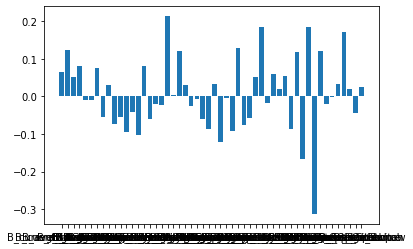

In [35]:
# get importance
importance = classifier.coef_[0]

# Get features
features = X.columns

# summarize feature importance
feature_count = 0

for i,v in enumerate(importance):
	print(f"{features[feature_count]}: {v}")
	feature_count += 1

pyplot.bar(features,importance)

Try deep neural network

In [17]:
# First, create a normal neural network with 52 inputs, 100 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=52))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=5000,
    shuffle=True,
    verbose=2
)

Epoch 1/5000
91/91 - 1s - loss: 0.6952 - accuracy: 0.5798 - 500ms/epoch - 5ms/step
Epoch 2/5000
91/91 - 0s - loss: 0.6361 - accuracy: 0.6442 - 69ms/epoch - 756us/step
Epoch 3/5000
91/91 - 0s - loss: 0.6174 - accuracy: 0.6604 - 71ms/epoch - 778us/step
Epoch 4/5000
91/91 - 0s - loss: 0.5901 - accuracy: 0.6895 - 70ms/epoch - 767us/step
Epoch 5/5000
91/91 - 0s - loss: 0.5643 - accuracy: 0.7051 - 74ms/epoch - 811us/step
Epoch 6/5000
91/91 - 0s - loss: 0.5403 - accuracy: 0.7286 - 74ms/epoch - 811us/step
Epoch 7/5000
91/91 - 0s - loss: 0.5140 - accuracy: 0.7587 - 70ms/epoch - 767us/step
Epoch 8/5000
91/91 - 0s - loss: 0.4802 - accuracy: 0.7802 - 70ms/epoch - 767us/step
Epoch 9/5000
91/91 - 0s - loss: 0.4540 - accuracy: 0.7892 - 70ms/epoch - 767us/step
Epoch 10/5000
91/91 - 0s - loss: 0.4142 - accuracy: 0.8217 - 86ms/epoch - 943us/step
Epoch 11/5000
91/91 - 0s - loss: 0.3881 - accuracy: 0.8332 - 83ms/epoch - 910us/step
Epoch 12/5000
91/91 - 0s - loss: 0.3408 - accuracy: 0.8667 - 122ms/epoch - 

KeyboardInterrupt: 

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

31/31 - 0s - loss: 24.8737 - accuracy: 0.5529 - 38ms/epoch - 1ms/step
Normal Neural Network - Loss: 24.873735427856445, Accuracy: 0.5529045462608337


Try random forest model

In [ ]:
# Create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

In [ ]:
# Fit the classifier to the data
rf = rf.fit(X_train_scaled, y_train_categorical)
rf.score(X_test_scaled, y_test_categorical)

0.5746887966804979

In [ ]:
# Display importance of each input
feature_names = X.columns

importances = rf.feature_importances_
importances

sorted(zip(importances, feature_names), reverse=True)

[(0.050442232504732565, 'R_avg_SIG_STR_landed'),
 (0.048928419211206546, 'B_avg_SIG_STR_landed'),
 (0.04669526105532995, 'R_avg_SIG_STR_pct'),
 (0.04643010205448254, 'B_avg_SIG_STR_pct'),
 (0.04259012676606264, 'B_age'),
 (0.04036049068059855, 'R_avg_TD_pct'),
 (0.03904482363262987, 'R_avg_TD_landed'),
 (0.03892093515842269, 'R_age'),
 (0.036989678142665634, 'R_total_rounds_fought'),
 (0.034626536190164474, 'B_avg_TD_landed'),
 (0.0336088114518425, 'B_total_rounds_fought'),
 (0.03330221072984976, 'B_avg_TD_pct'),
 (0.03278157499319959, 'B_Reach_cms'),
 (0.03267759987318925, 'R_avg_SUB_ATT'),
 (0.03181098052008269, 'R_Reach_cms'),
 (0.028848993818383455, 'B_Height_cms'),
 (0.02852496910506174, 'B_avg_SUB_ATT'),
 (0.027720068600136566, 'R_Height_cms'),
 (0.022950570471415892, 'R_losses'),
 (0.02221592076256469, 'R_wins'),
 (0.020263863950741458, 'B_wins'),
 (0.018875708012806722, 'B_losses'),
 (0.01836043265273191, 'R_longest_win_streak'),
 (0.016623110922412514, 'R_win_by_Decision_Unani

Logistic regression model has the highest accuracy (63%), therefore this will be used to create our prediction

In [33]:
# save model 
import joblib 

joblib.dump(classifier, "ml_models/model.sav")
joblib.dump(X_scaler, "ml_models/x_scaler.sav")
joblib.dump(label_encoder, "ml_models/encoder.sav")
joblib.dump(features, "ml_models/features.sav")

['ml_models/features.sav']